First Importing the Libraries

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree
from collections import Counter
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns



Loading the dataset and call it as survey,
Displays column names, data types, and missing values
Shows sample rows

In [2]:
# Load the dataset
survey = pd.read_csv("/kaggle/input/stack-overflow-annual-developer-survey-2024/survey_results_public.csv")
survey.head()


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [4]:
survey.shape
survey.columns.tolist()


['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [5]:
# Define your selected features
selected_features = [
    "Country", "EdLevel", "DevType", "Employment",
    "YearsCode", "ConvertedCompYearly", "LanguageHaveWorkedWith"
]

# Display first 5 rows of these columns
print(" First 5 rows of selected features:")
display(survey[selected_features].head())

# Check for null values
print("\n Null values in selected features:")
display(survey[selected_features].isnull().sum())


 First 5 rows of selected features:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country,EdLevel,DevType,Employment,YearsCode,ConvertedCompYearly,LanguageHaveWorkedWith
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN,NaN,NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","Employed, full-time",20,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Developer Experience,"Employed, full-time",37,NaN,C#
3,Canada,Some college/university study without earning ...,"Developer, full-stack","Student, full-time",4,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4,Norway,"Secondary school (e.g. American high school, G...","Developer, full-stack","Student, full-time",9,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust



 Null values in selected features:


Country                    6507
EdLevel                    4653
DevType                    5992
Employment                    0
YearsCode                  5568
ConvertedCompYearly       42002
LanguageHaveWorkedWith     5692
dtype: int64

In [6]:
# Create a feature summary manually
feature_descriptions = {
    "Country": "Developer's country of residence",
    "EdLevel": "Highest education level attained",
    "DevType": "Developer role (e.g., full-stack, backend)",
    "Employment": "Employment type (e.g., full-time, student)",
    "YearsCode": "Years of coding experience",
    "ConvertedCompYearly": "Annual income in USD",
    "LanguageHaveWorkedWith": "Languages developer has worked with"
}

feature_summary = pd.DataFrame({
    "Feature": selected_features,
    "Description": [feature_descriptions[feature] for feature in selected_features],
    "Data Type": [survey[feature].dtype for feature in selected_features],
    "Unique Values": [survey[feature].nunique() for feature in selected_features],
    "Missing Values": [survey[feature].isnull().sum() for feature in selected_features]
})

# Display the table
feature_summary


,Feature,Description,Data Type,Unique Values,Missing Values
0,Country,Developer's country of residence,object,185,6507
1,EdLevel,Highest education level attained,object,8,4653
2,DevType,"Developer role (e.g., full-stack, backend)",object,34,5992
3,Employment,"Employment type (e.g., full-time, student)",object,110,0
4,YearsCode,Years of coding experience,object,52,5568
5,ConvertedCompYearly,Annual income in USD,float64,6113,42002
6,LanguageHaveWorkedWith,Languages developer has worked with,object,23864,5692


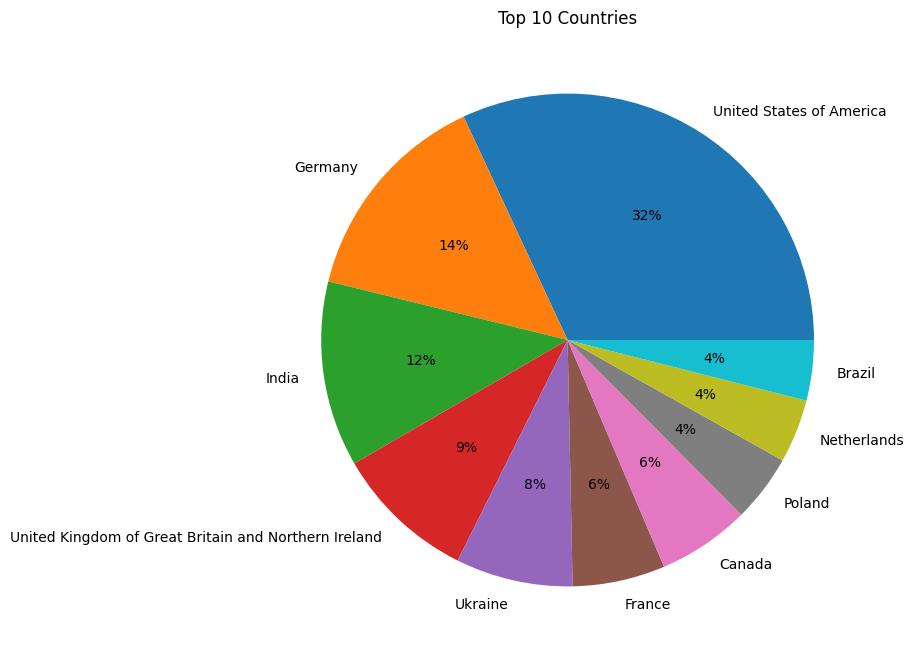

In [7]:
# Pie chart of top 10 countries
survey['Country'].value_counts().head(10).plot(kind='pie', title='Top 10 Countries', autopct='%1.0f%%', figsize=(8, 8))
plt.ylabel('')
plt.show()




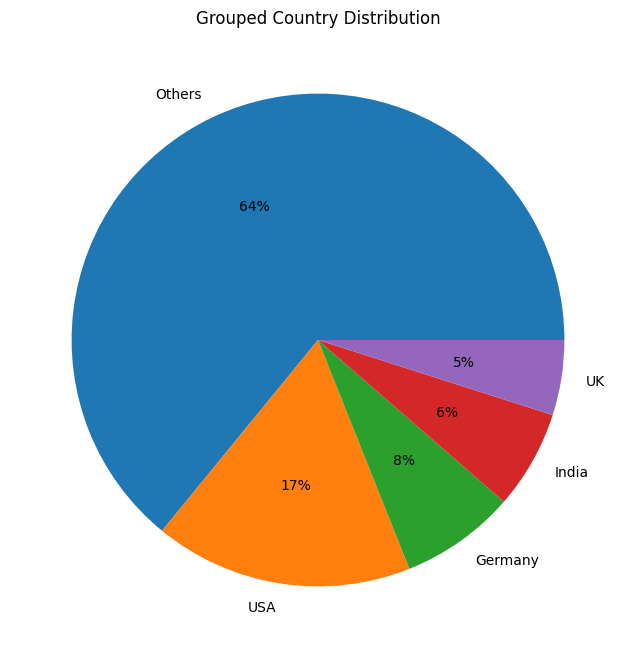

In [8]:
def select_countries(x):
    if x == "United States of America":
        return "USA"
    elif x == "United Kingdom of Great Britain and Northern Ireland":
        return "UK"
    elif x == "India":
        return "India"
    elif x == "Germany":
        return "Germany"
    else:
        return "Others"

survey['mostCountry'] = survey['Country'].astype(str).apply(select_countries)
survey['mostCountry'].value_counts().plot(kind='pie', title='Grouped Country Distribution', autopct='%1.0f%%', figsize=(8, 8))
plt.ylabel('')
plt.show()

In [9]:
# Create Interactive Map of Respondent Distribution 
import plotly.express as px

country_counts = survey["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "Respondents"]

fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Respondents",
    hover_name="Country",
    title="Number of Survey Respondents by Country",
    color_continuous_scale=px.colors.sequential.Plasma
)

# Save the interactive map
fig.write_html("respondents_country_map.html")


In [10]:
# This section embeds an interactive choropleth map displaying the number of survey respondents per country
# based on the 2024 Stack Overflow Developer Survey.
 
from IPython.display import IFrame

IFrame(src="respondents_country_map.html", width=1000, height=600)

In [11]:

# Explore salary feature
survey['ConvertedCompYearly'].head()
survey['ConvertedCompYearly'].isna().sum()


42002

In [12]:
survey['Employment'].head()
survey['Employment'].isna().sum()

0

In [13]:
# Drop missing compensation values
survey_cleaned = survey.dropna(subset=['ConvertedCompYearly'])
survey_cleaned['ConvertedCompYearly'].isna().sum()



0

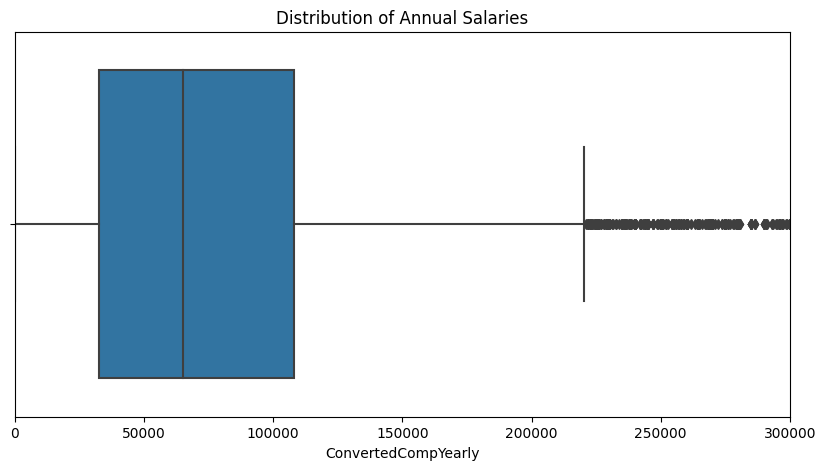

In [14]:

# Box plot of annual salary
plt.figure(figsize=(10, 5))
sns.boxplot(data=survey_cleaned, x='ConvertedCompYearly')
plt.title("Distribution of Annual Salaries")
plt.xlim(0, 300000)
plt.show()


In [15]:
# 1. Start fresh with the rows that have salary
survey_cleaned = survey.dropna(subset=["ConvertedCompYearly"]).copy()

# 2. Clean 'Employment'
survey_cleaned["Employment"] = survey_cleaned["Employment"].fillna("Unknown")
survey_cleaned["Employment"] = survey_cleaned["Employment"].apply(lambda x: x.split(";")[0].strip())

# 3. Clean 'YearsCode'
survey_cleaned["YearsCode"] = pd.to_numeric(survey_cleaned["YearsCode"], errors="coerce")
survey_cleaned["YearsCode"] = survey_cleaned["YearsCode"].fillna(survey_cleaned["YearsCode"].median())


# 4. Create 'highIncome'
income_median = survey_cleaned["ConvertedCompYearly"].median()
print("Median Salary:", income_median)
survey_cleaned["highIncome"] = survey_cleaned["ConvertedCompYearly"].apply(lambda x: 1 if x > income_median else 0)

survey_cleaned[["Employment", "YearsCode", "highIncome"]].dropna().shape

# 5. Clean Education level 
survey_cleaned["EdLevel"] = survey_cleaned["EdLevel"].fillna("Unknown")

# 6. Clean Developer Type
survey_cleaned["DevType"] = survey_cleaned["DevType"].fillna("Unknown")
all_dev_types = survey_cleaned["DevType"].str.split(';')
flat_dev_list = [item.strip() for sublist in all_dev_types.dropna() for item in sublist]
from collections import Counter
dev_counts = Counter(flat_dev_list)
top_dev_types = dict(sorted(dev_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# 7. Clean LanguageHaveWorkedWith
survey_cleaned["LanguageHaveWorkedWith"] = survey_cleaned["LanguageHaveWorkedWith"].fillna("Unknown")
all_langs = survey_cleaned["LanguageHaveWorkedWith"].str.split(';')
flat_lang_list = [item.strip() for sublist in all_langs.dropna() for item in sublist]
lang_counts = Counter(flat_lang_list)
top_langs = dict(sorted(lang_counts.items(), key=lambda x: x[1], reverse=True)[:10])


Median Salary: 65000.0


In [16]:
# Check for nulls after cleaning
print("Null values after cleaning (survey_cleaned):")
display(survey_cleaned[selected_features].isnull().sum())

Null values after cleaning (survey_cleaned):


Country                   0
EdLevel                   0
DevType                   0
Employment                0
YearsCode                 0
ConvertedCompYearly       0
LanguageHaveWorkedWith    0
dtype: int64

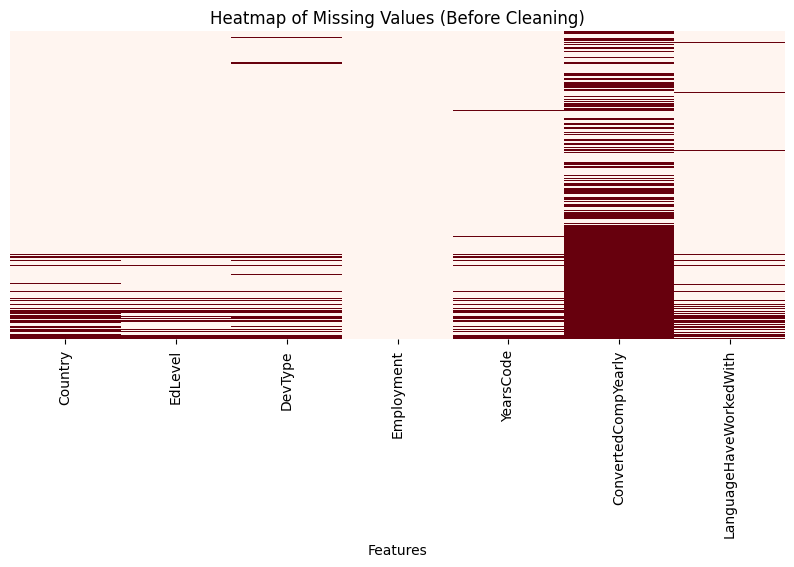

In [17]:
# Plot heatmap for nulls before cleaning
plt.figure(figsize=(10, 4))
sns.heatmap(survey[selected_features].isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title("Heatmap of Missing Values (Before Cleaning)")
plt.xlabel("Features")
plt.show()

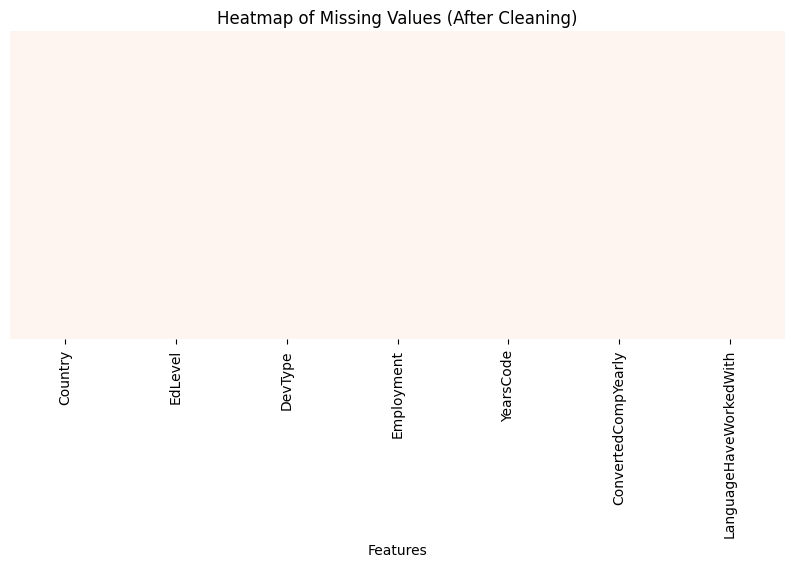

In [18]:
# Plot heatmap for nulls
plt.figure(figsize=(10, 4))
sns.heatmap(survey_cleaned[selected_features].isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title("Heatmap of Missing Values (After Cleaning)")
plt.xlabel("Features")
plt.show()

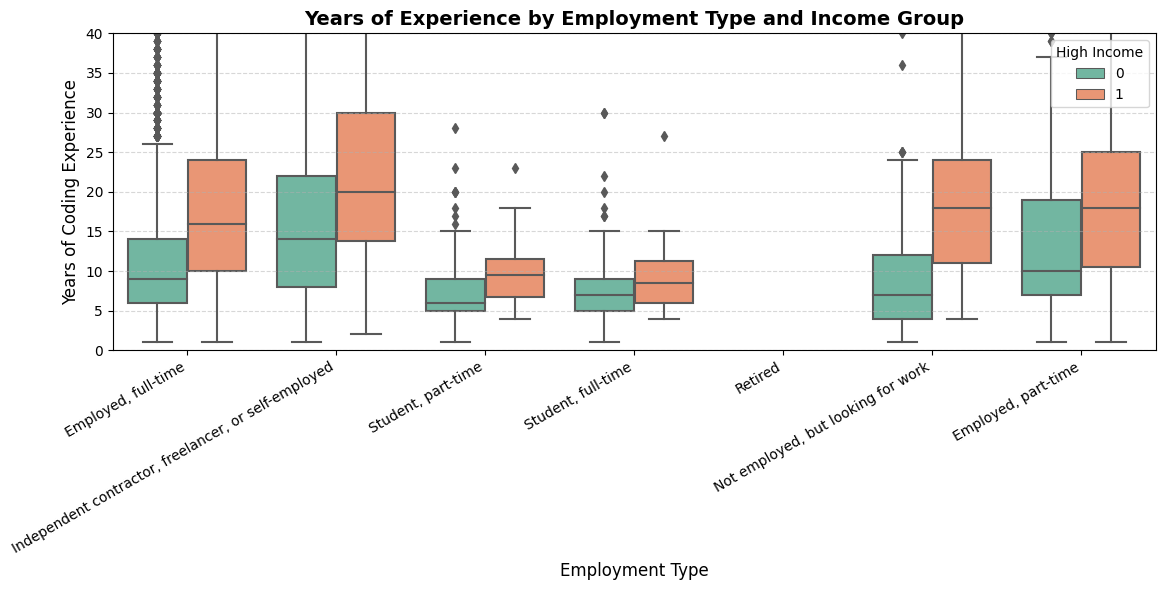

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="Employment",
    y="YearsCode",
    hue="highIncome",
    data=survey_cleaned,
    palette="Set2"
)
plt.title("Years of Experience by Employment Type and Income Group", fontsize=14, weight='bold')
plt.xlabel("Employment Type", fontsize=12)
plt.ylabel("Years of Coding Experience", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 40)
plt.legend(title="High Income", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



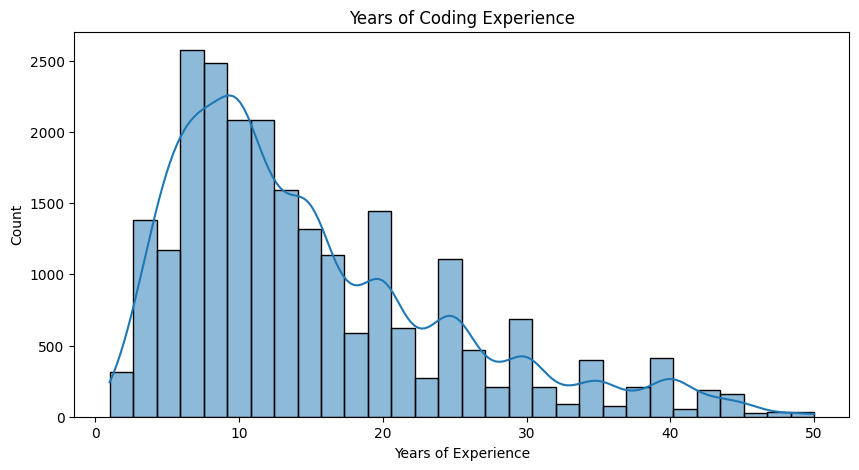

In [20]:
# Years of coding experience of Histogram

plt.figure(figsize=(10, 5))
sns.histplot(survey_cleaned['YearsCode'], bins=30, kde=True)
plt.title("Years of Coding Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.show()


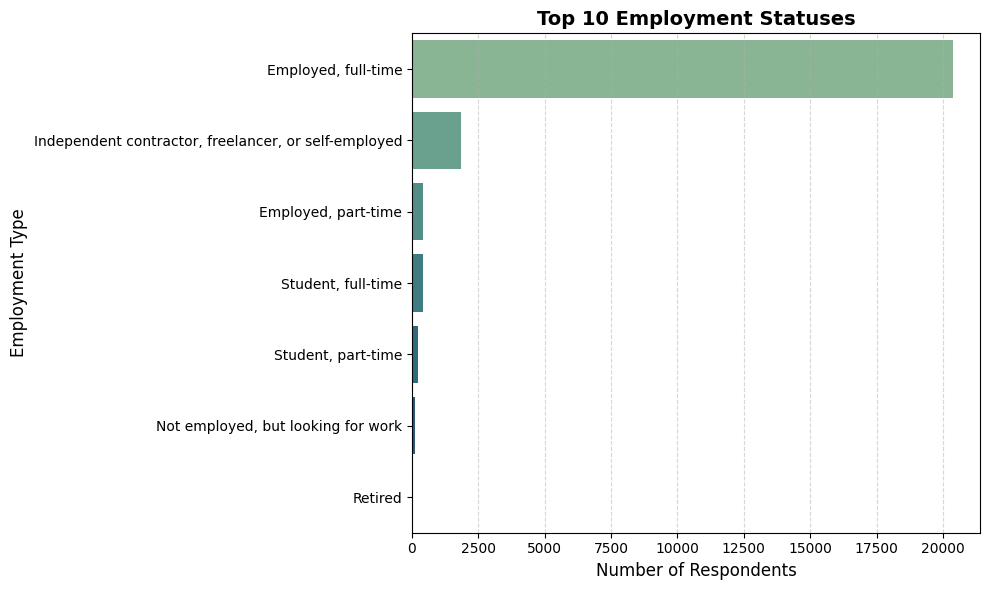

In [21]:
# Employment distribution Bargraph

# Top 10 Employment Types Bar Plot
plt.figure(figsize=(10, 6))
employment_counts = survey_cleaned["Employment"].value_counts().head(10)

sns.barplot(
    x=employment_counts.values,
    y=employment_counts.index,
    palette="crest"
)

plt.title("Top 10 Employment Statuses", fontsize=14, weight='bold')
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Employment Type", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



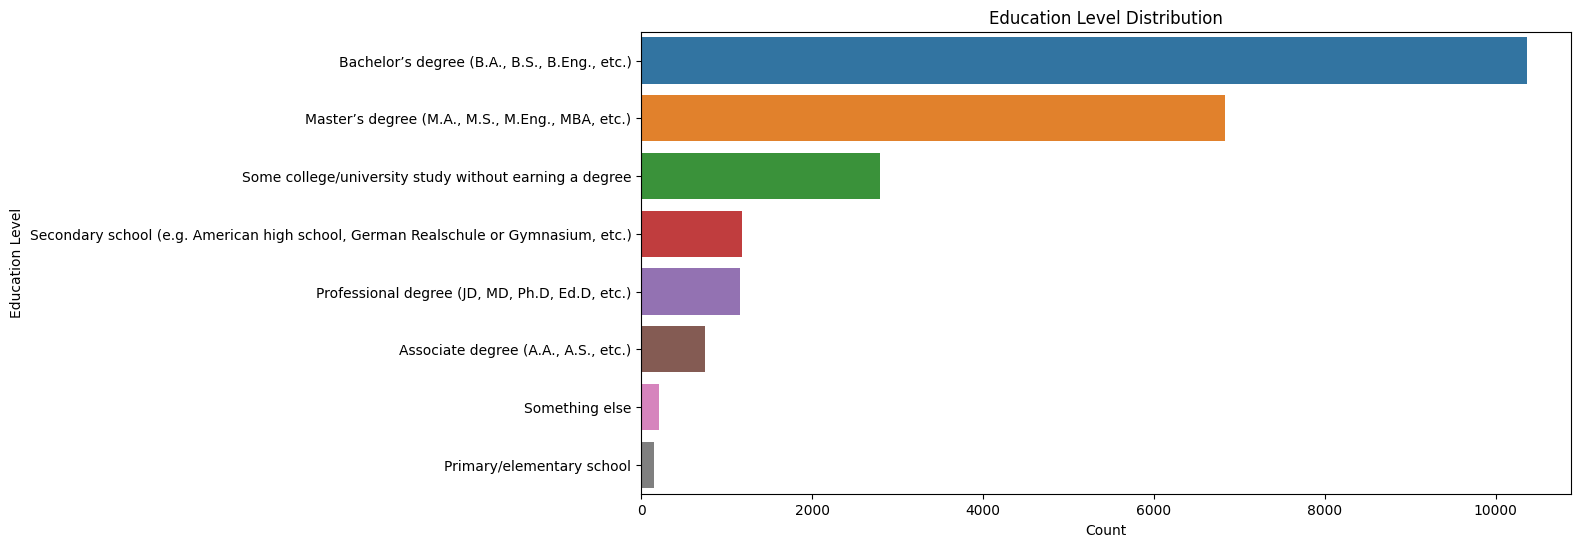

In [22]:
# Education level Countplot
plt.figure(figsize=(12, 6))
sns.countplot(y='EdLevel', data=survey_cleaned, order=survey_cleaned['EdLevel'].value_counts().index[:10])
plt.title("Education Level Distribution")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



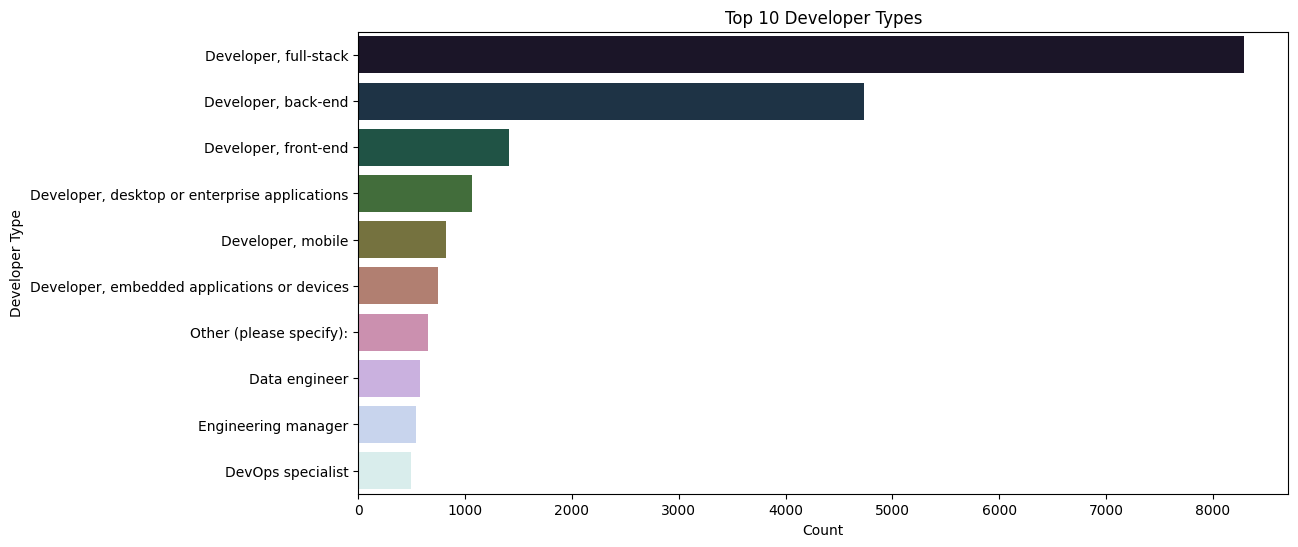

In [23]:
# Developer Type Barplot 

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_dev_types.values()), y=list(top_dev_types.keys()), palette="cubehelix")
plt.title("Top 10 Developer Types")
plt.xlabel("Count")
plt.ylabel("Developer Type")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



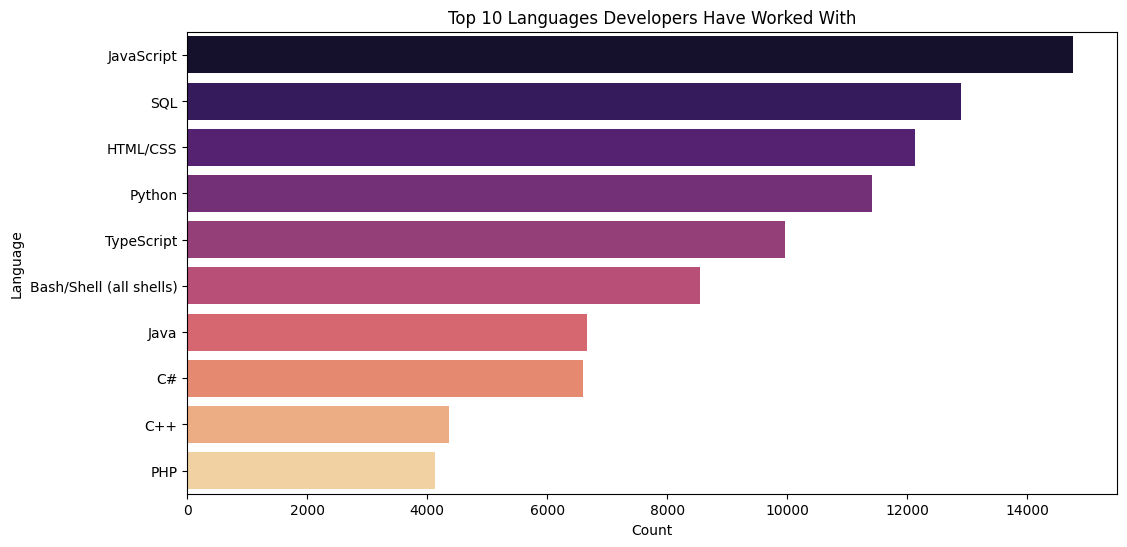

In [24]:
# Programming languages worked with Barplot

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_langs.values()), y=list(top_langs.keys()), palette="magma")
plt.title("Top 10 Languages Developers Have Worked With")
plt.xlabel("Count")
plt.ylabel("Language")
plt.show()



In [25]:
survey_cleaned[["Country", "EdLevel", "DevType", "Employment", "YearsCode", "ConvertedCompYearly", "LanguageHaveWorkedWith"]].describe(include="all")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,Country,EdLevel,DevType,Employment,YearsCode,ConvertedCompYearly,LanguageHaveWorkedWith
count,23435,23435,23435,23435,23435.000000,2.343500e+04,23435
unique,166,8,35,7,NaN,NaN,10585
top,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","Employed, full-time",NaN,NaN,HTML/CSS;JavaScript;TypeScript
freq,4677,10365,8290,20374,NaN,NaN,438
mean,NaN,NaN,NaN,NaN,15.004096,8.615529e+04,NaN
std,NaN,NaN,NaN,NaN,9.740846,1.867570e+05,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,8.000000,3.271200e+04,NaN
50%,NaN,NaN,NaN,NaN,12.000000,6.500000e+04,NaN
75%,NaN,NaN,NaN,NaN,20.000000,1.079715e+05,NaN


<Axes: xlabel='YearsCode', ylabel='ConvertedCompYearly'>

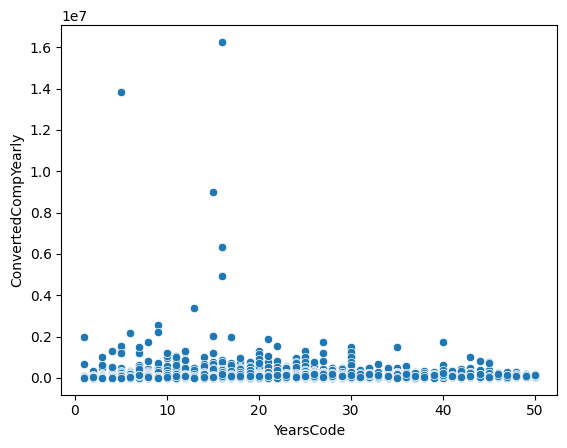

In [26]:
sns.scatterplot(x="YearsCode", y="ConvertedCompYearly", data=survey_cleaned)

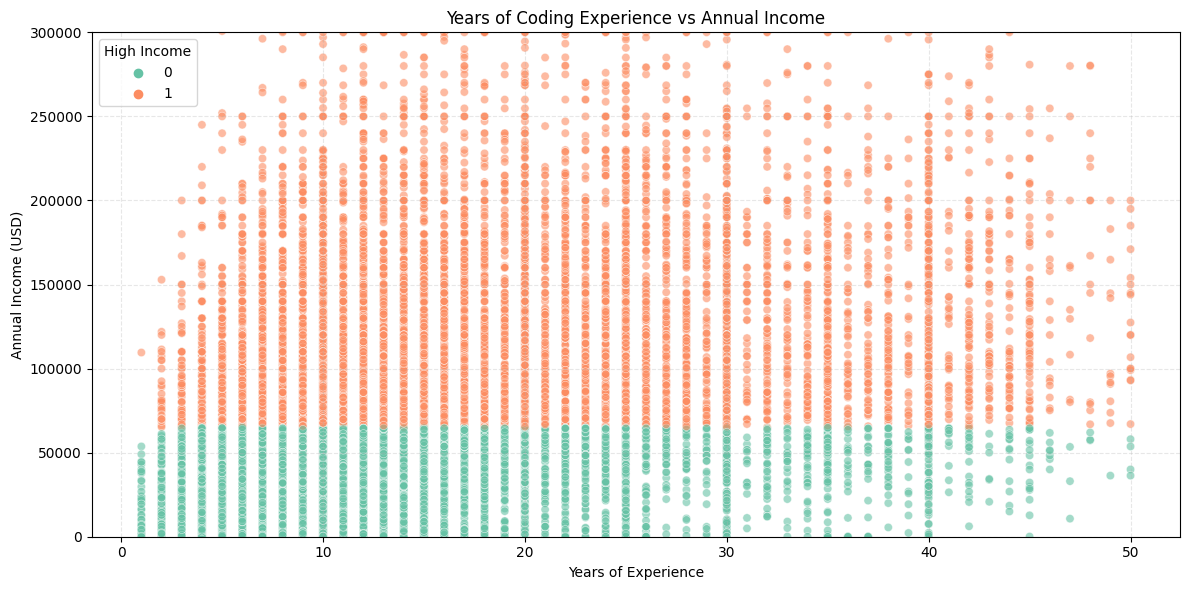

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=survey_cleaned,
    x="YearsCode",
    y="ConvertedCompYearly",
    hue="highIncome",
    alpha=0.6,
    palette="Set2"
)
plt.title("Years of Coding Experience vs Annual Income")
plt.xlabel("Years of Experience")
plt.ylabel("Annual Income (USD)")
plt.ylim(0, 300000)  # Focus on realistic income range
plt.legend(title="High Income")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


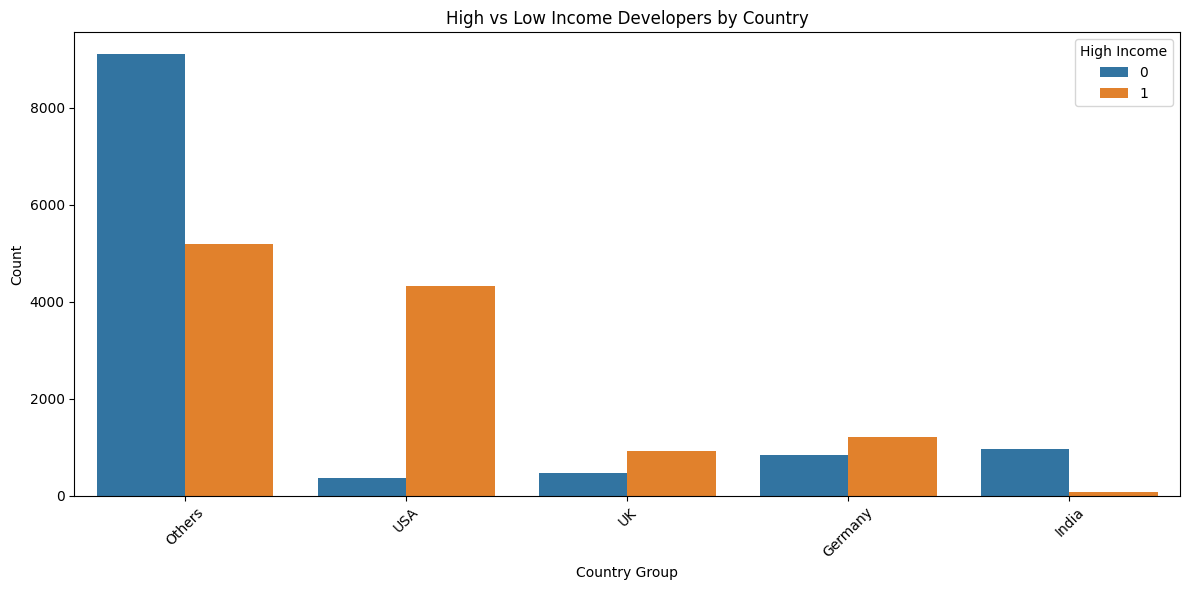

In [28]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='mostCountry', hue='highIncome', data=survey_cleaned)
plt.title("High vs Low Income Developers by Country")
plt.xlabel("Country Group")
plt.ylabel("Count")
plt.legend(title="High Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
survey_cleaned[["Employment", "YearsCode", "highIncome"]].isnull().sum()


Employment    0
YearsCode     0
highIncome    0
dtype: int64

In [30]:
survey_cleaned[["Employment", "YearsCode", "highIncome"]].dropna().shape



(23435, 3)

In [31]:
survey[["Country", "Employment", "EdLevel", "YearsCode", "DevType", "LanguageHaveWorkedWith", "ConvertedCompYearly"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 58930 non-null  object 
 1   Employment              65437 non-null  object 
 2   EdLevel                 60784 non-null  object 
 3   YearsCode               59869 non-null  object 
 4   DevType                 59445 non-null  object 
 5   LanguageHaveWorkedWith  59745 non-null  object 
 6   ConvertedCompYearly     23435 non-null  float64
dtypes: float64(1), object(6)
memory usage: 3.5+ MB


In [32]:
# See column names, types, and null values
survey_cleaned[["Country", "Employment", "EdLevel", "YearsCode", "DevType", "LanguageHaveWorkedWith", "ConvertedCompYearly"]].info()


<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 23435 non-null  object 
 1   Employment              23435 non-null  object 
 2   EdLevel                 23435 non-null  object 
 3   YearsCode               23435 non-null  float64
 4   DevType                 23435 non-null  object 
 5   LanguageHaveWorkedWith  23435 non-null  object 
 6   ConvertedCompYearly     23435 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.4+ MB


In [33]:
# Function to count outliers using IQR method
def count_outliers(series):
    if pd.api.types.is_numeric_dtype(series):
        series_clean = series.dropna()
        q1 = series_clean.quantile(0.25)
        q3 = series_clean.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        return ((series_clean < lower) | (series_clean > upper)).sum()
    return "N/A"


# Build table before cleaning
before_cleaning = {
    "Feature": [],
    "Data Type (Before)": [],
    "Missing Values (Before)": [],
    "Outliers (Before)": []
}
for feature in selected_features:
    before_cleaning["Feature"].append(feature)
    before_cleaning["Data Type (Before)"].append(survey[feature].dtype)
    before_cleaning["Missing Values (Before)"].append(survey[feature].isnull().sum())
    before_cleaning["Outliers (Before)"].append(count_outliers(survey[feature]))

# Build table after cleaning
after_cleaning = {
    "Data Type (After)": [],
    "Missing Values (After)": [],
    "Outliers (After)": []
}
for feature in selected_features:
    after_cleaning["Data Type (After)"].append(survey_cleaned[feature].dtype)
    after_cleaning["Missing Values (After)"].append(survey_cleaned[feature].isnull().sum())
    after_cleaning["Outliers (After)"].append(count_outliers(survey_cleaned[feature]))

# Combine both into a DataFrame
feature_summary = pd.DataFrame(before_cleaning)
feature_summary["Data Type (After)"] = after_cleaning["Data Type (After)"]
feature_summary["Missing Values (After)"] = after_cleaning["Missing Values (After)"]
feature_summary["Outliers (After)"] = after_cleaning["Outliers (After)"]

# Display the table
feature_summary


,Feature,Data Type (Before),Missing Values (Before),Outliers (Before),Data Type (After),Missing Values (After),Outliers (After)
0,Country,object,6507,N/A,object,0,N/A
1,EdLevel,object,4653,N/A,object,0,N/A
2,DevType,object,5992,N/A,object,0,N/A
3,Employment,object,0,N/A,object,0,N/A
4,YearsCode,object,5568,N/A,float64,0,911
5,ConvertedCompYearly,float64,42002,978,float64,0,978
6,LanguageHaveWorkedWith,object,5692,N/A,object,0,N/A


In [34]:
survey_cleaned.to_csv("/kaggle/working/survey_cleaned.csv", index=False)
df = pd.read_csv("survey_cleaned.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,mostCountry,highIncome
0,73,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,Others,0
1,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,Others,0
2,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0,Others,1
3,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN,Others,0
4,390,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,USA,1


In [35]:
# Reload your cleaned dataset
survey_cleaned = pd.read_csv("survey_cleaned.csv")

# Features for clustering
categorical = ["Country", "Employment", "EdLevel", "DevType", "LanguageHaveWorkedWith"]
numeric = ["YearsCode", "ConvertedCompYearly"]

# Simplify multi-label fields
survey_cleaned["DevType"] = survey_cleaned["DevType"].apply(lambda x: x.split(";")[0] if isinstance(x, str) else x)
survey_cleaned["LanguageHaveWorkedWith"] = survey_cleaned["LanguageHaveWorkedWith"].apply(lambda x: x.split(";")[0] if isinstance(x, str) else x)
survey_cleaned["YearsCode"] = pd.to_numeric(survey_cleaned["YearsCode"], errors="coerce")

# Drop rows with missing values
clustering_df = survey_cleaned[categorical + numeric].dropna()

# One-hot encode
clustering_encoded = pd.get_dummies(clustering_df, drop_first=True)

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_encoded)

# Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# Assign cluster labels back to the main DataFrame
survey_cleaned.loc[clustering_df.index, "Cluster"] = cluster_labels

# Save updated CSV
survey_cleaned.to_csv("survey_cleaned_with_clusters.csv", index=False)


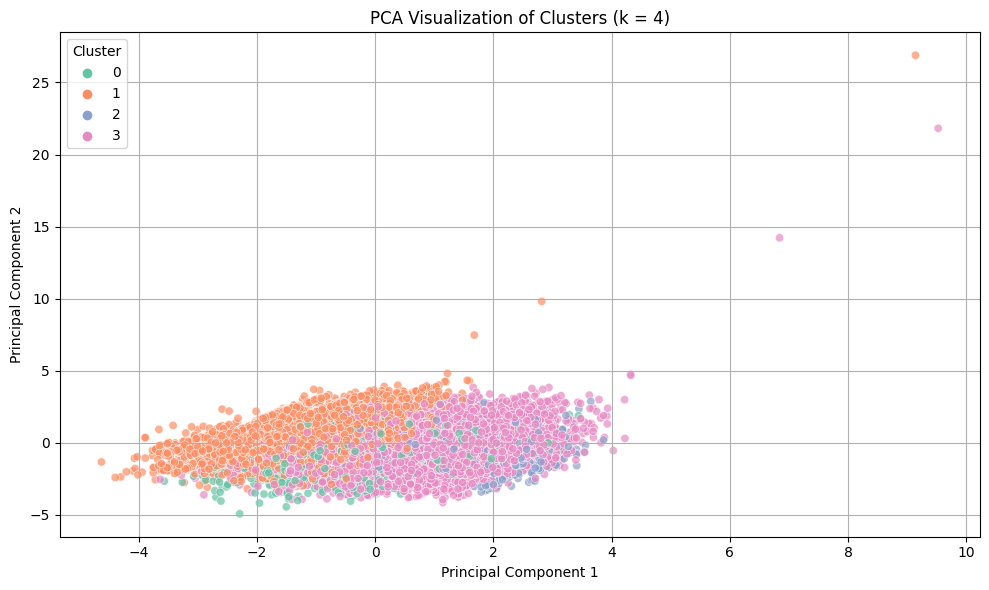

In [36]:
# Use clustering_encoded and scaled_data from before
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = survey_cleaned.loc[clustering_df.index, "Cluster"].astype(int)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", alpha=0.7)
plt.title("PCA Visualization of Clusters (k = 4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


Bar Plot: Number of Respondents per Cluster

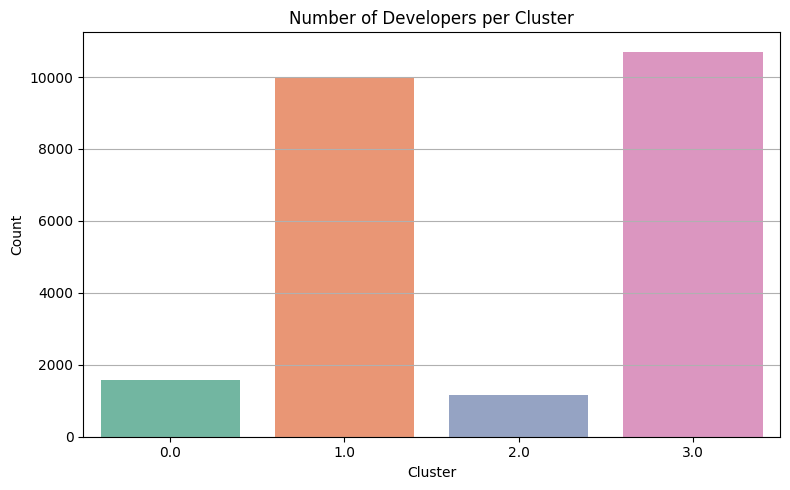

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Cluster", data=survey_cleaned, palette="Set2")
plt.title("Number of Developers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


Boxplot: Income Distribution per Cluster

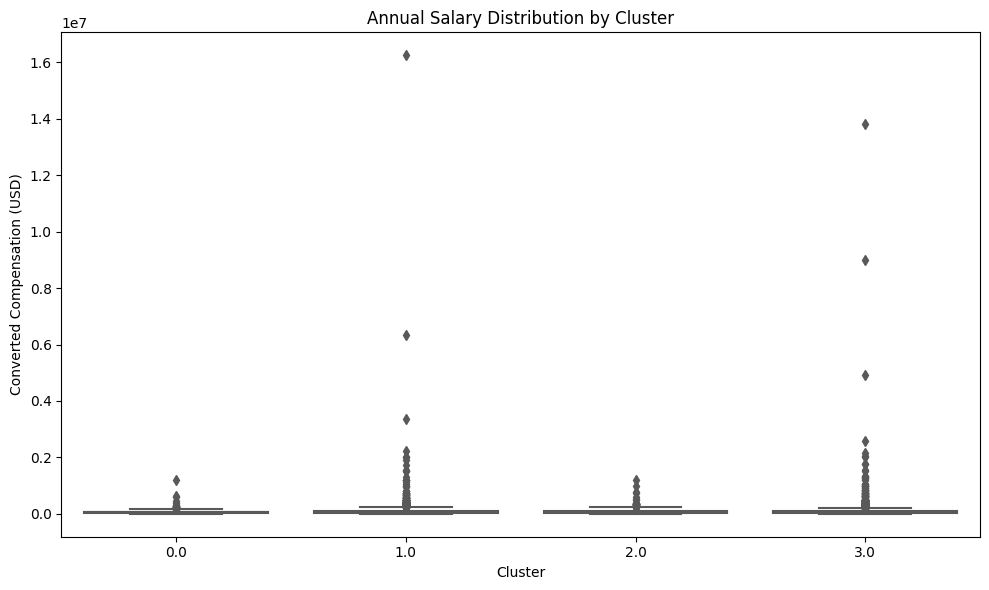

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=survey_cleaned, x="Cluster", y="ConvertedCompYearly", palette="Set2")
plt.title("Annual Salary Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Converted Compensation (USD)")
plt.tight_layout()
plt.show()


Bar Plot: Average Salary and Experience Side-by-Side

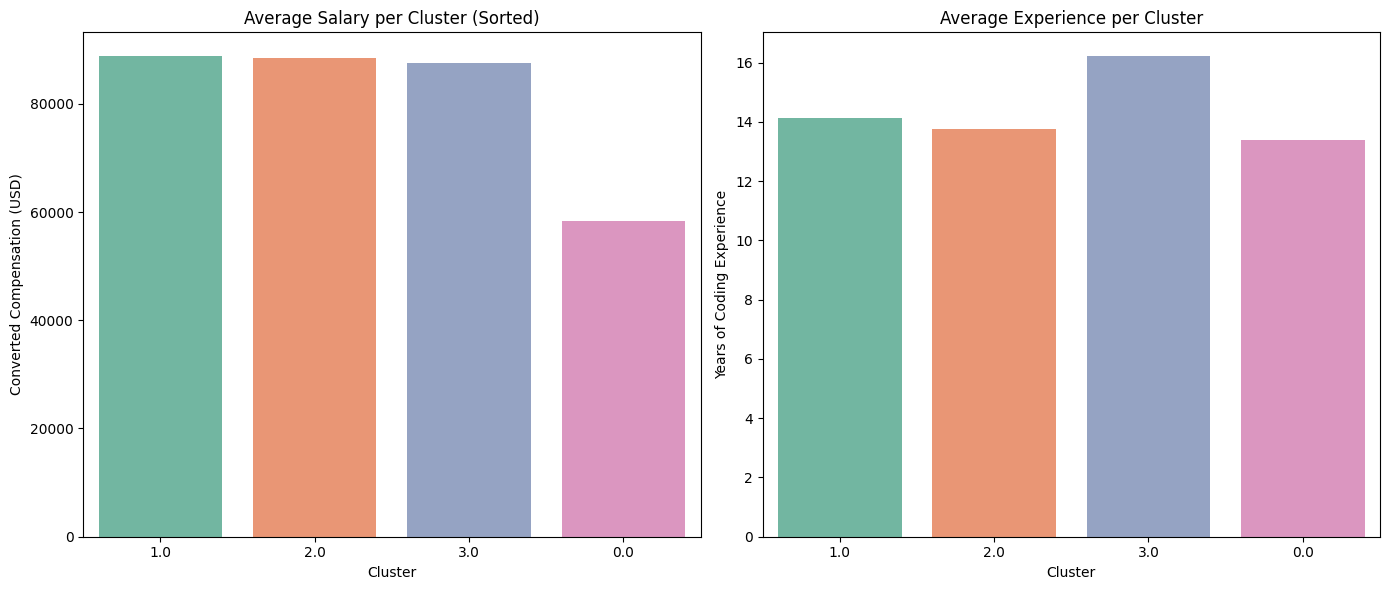

In [39]:
# Compute average values and sort by salary
avg_values = survey_cleaned.groupby("Cluster")[["ConvertedCompYearly", "YearsCode"]].mean().round(2)
avg_values = avg_values.sort_values(by="ConvertedCompYearly", ascending=False).reset_index()
avg_values["Cluster"] = avg_values["Cluster"].astype(str)
# Plot side-by-side bars
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Salary plot
sns.barplot(x="Cluster", y="ConvertedCompYearly", data=avg_values, ax=axes[0], palette="Set2")
axes[0].set_title("Average Salary per Cluster (Sorted)")
axes[0].set_ylabel("Converted Compensation (USD)")
axes[0].set_xlabel("Cluster")

# Experience plot
sns.barplot(x="Cluster", y="YearsCode", data=avg_values, ax=axes[1], palette="Set2")
axes[1].set_title("Average Experience per Cluster")
axes[1].set_ylabel("Years of Coding Experience")
axes[1].set_xlabel("Cluster")

plt.tight_layout()
plt.show()


In [40]:
top_countries = (
    survey_cleaned.groupby("Cluster")["Country"]
    .value_counts()
    .groupby(level=0)
    .head(1)
    .reset_index(name="Count")
)
top_countries


,Cluster,Country,Count
0,0.0,Sweden,442
1,1.0,United States of America,2670
2,2.0,United States of America,252
3,3.0,United States of America,1654


In [41]:
top_devtype = (
    survey_cleaned.groupby("Cluster")["DevType"]
    .value_counts()
    .groupby(level=0)
    .head(1)
    .reset_index(name="Count")
)
top_devtype


,Cluster,DevType,Count
0,0.0,"Developer, full-stack",644
1,1.0,"Developer, full-stack",4102
2,2.0,Data engineer,579
3,3.0,"Developer, full-stack",3512


In [42]:
top_language = (
    survey_cleaned.groupby("Cluster")["LanguageHaveWorkedWith"]
    .value_counts()
    .groupby(level=0)
    .head(1)
    .reset_index(name="Count")
)
top_language


,Cluster,LanguageHaveWorkedWith,Count
0,0.0,Bash/Shell (all shells),518
1,1.0,Bash/Shell (all shells),3262
2,2.0,Python,663
3,3.0,Bash/Shell (all shells),3803


In [43]:
# Load dataset with clusters
survey_cleaned = pd.read_csv("survey_cleaned_with_clusters.csv")

# Ensure experience is numeric
survey_cleaned["YearsCode"] = pd.to_numeric(survey_cleaned["YearsCode"], errors="coerce")

# Group by cluster and calculate means
cluster_summary = survey_cleaned.groupby("Cluster")[["ConvertedCompYearly", "YearsCode"]].mean().round(2)

# Add accurate interpretation based on current stats
cluster_summary["Interpretation"] = [
    "Low-income, early-career developers",         # Cluster 0 (lowest salary)
    "High-income, experienced professionals",       # Cluster 1 (highest salary)
    "Well-paid, mid-experience developers",         # Cluster 2 (close to Cluster 1)
    "Most experienced, but slightly underpaid"      # Cluster 3 (highest experience, 3rd salary)
]

# Reset and sort by salary for visual match with graph
cluster_summary = cluster_summary.reset_index()
cluster_summary = cluster_summary.sort_values(by="ConvertedCompYearly", ascending=False).reset_index(drop=True)

# Rename for clarity
cluster_summary.columns = ["Cluster", "Avg Salary (USD)", "Avg Experience (Years)", "Interpretation"]

# Display the DataFrame
cluster_summary


,Cluster,Avg Salary (USD),Avg Experience (Years),Interpretation
0,1.0,88766.14,14.12,"High-income, experienced professionals"
1,2.0,88377.11,13.75,"Well-paid, mid-experience developers"
2,3.0,87562.11,16.21,"Most experienced, but slightly underpaid"
3,0.0,58425.77,13.38,"Low-income, early-career developers"


In [44]:
import pandas as pd

# Load dataset
df = pd.read_csv("survey_cleaned_with_clusters.csv")

# Selected features and target
features = ["Country", "Employment", "EdLevel", "DevType", "LanguageHaveWorkedWith", "YearsCode"]
target = "highIncome"

# Clean multi-response fields
df["DevType"] = df["DevType"].apply(lambda x: x.split(";")[0] if isinstance(x, str) else x)
df["LanguageHaveWorkedWith"] = df["LanguageHaveWorkedWith"].apply(lambda x: x.split(";")[0] if isinstance(x, str) else x)
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors="coerce")

# Drop missing values
df_cleaned = df[features + [target]].dropna()

# One-hot encode categorical features
X = pd.get_dummies(df_cleaned[features], drop_first=True)

# Target variable
y = df_cleaned[target]


In [45]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [46]:
# Train a Decision Tree Classifier
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


In [47]:
# Evaluate the model
from sklearn import metrics

print("Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, y_pred)))


Accuracy: 0.75


In [48]:
# Train a Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [49]:
# Evaluate the Logistic Regression model
from sklearn import metrics

print("Logistic Regression Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, y_pred_lr)))


Logistic Regression Accuracy: 0.83


In [50]:
# Train a Decision Tree Classifier with entropy and max_depth=4
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [51]:
# Evaluate the Decision Tree model
print("Decision Tree Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, y_pred_dt)))


Decision Tree Accuracy: 0.75


In [52]:
# Train a k-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [53]:
# Combine all classifiers using Voting Classifier
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
], voting='hard')

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)


In [54]:
# Evaluate the Voting Classifier model
print("Voting Classifier Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, y_pred_ensemble)))


Voting Classifier Accuracy: 0.80


In [55]:
# Evaluate Logistic Regression model (Precision, Recall, F1)
print("Logistic Regression Precision: {0:.2f}".format(metrics.precision_score(y_test, y_pred_lr)))
print("Logistic Regression Recall:    {0:.2f}".format(metrics.recall_score(y_test, y_pred_lr)))
print("Logistic Regression F1 Score:  {0:.2f}".format(metrics.f1_score(y_test, y_pred_lr)))


Logistic Regression Precision: 0.84
Logistic Regression Recall:    0.81
Logistic Regression F1 Score:  0.83


In [56]:
# Evaluate Decision Tree model (Precision, Recall, F1)
print("Decision Tree Precision: {0:.2f}".format(metrics.precision_score(y_test, y_pred_dt)))
print("Decision Tree Recall:    {0:.2f}".format(metrics.recall_score(y_test, y_pred_dt)))
print("Decision Tree F1 Score:  {0:.2f}".format(metrics.f1_score(y_test, y_pred_dt)))


Decision Tree Precision: 0.78
Decision Tree Recall:    0.69
Decision Tree F1 Score:  0.73


In [57]:
# Evaluate k-NN model (Precision, Recall, F1)
print("k-NN Precision: {0:.2f}".format(metrics.precision_score(y_test, y_pred_knn)))
print("k-NN Recall:    {0:.2f}".format(metrics.recall_score(y_test, y_pred_knn)))
print("k-NN F1 Score:  {0:.2f}".format(metrics.f1_score(y_test, y_pred_knn)))


k-NN Precision: 0.72
k-NN Recall:    0.80
k-NN F1 Score:  0.76


In [58]:
# Evaluate Ensemble model (Precision, Recall, F1)
print("Voting Classifier Precision: {0:.2f}".format(metrics.precision_score(y_test, y_pred_ensemble)))
print("Voting Classifier Recall:    {0:.2f}".format(metrics.recall_score(y_test, y_pred_ensemble)))
print("Voting Classifier F1 Score:  {0:.2f}".format(metrics.f1_score(y_test, y_pred_ensemble)))


Voting Classifier Precision: 0.81
Voting Classifier Recall:    0.78
Voting Classifier F1 Score:  0.79


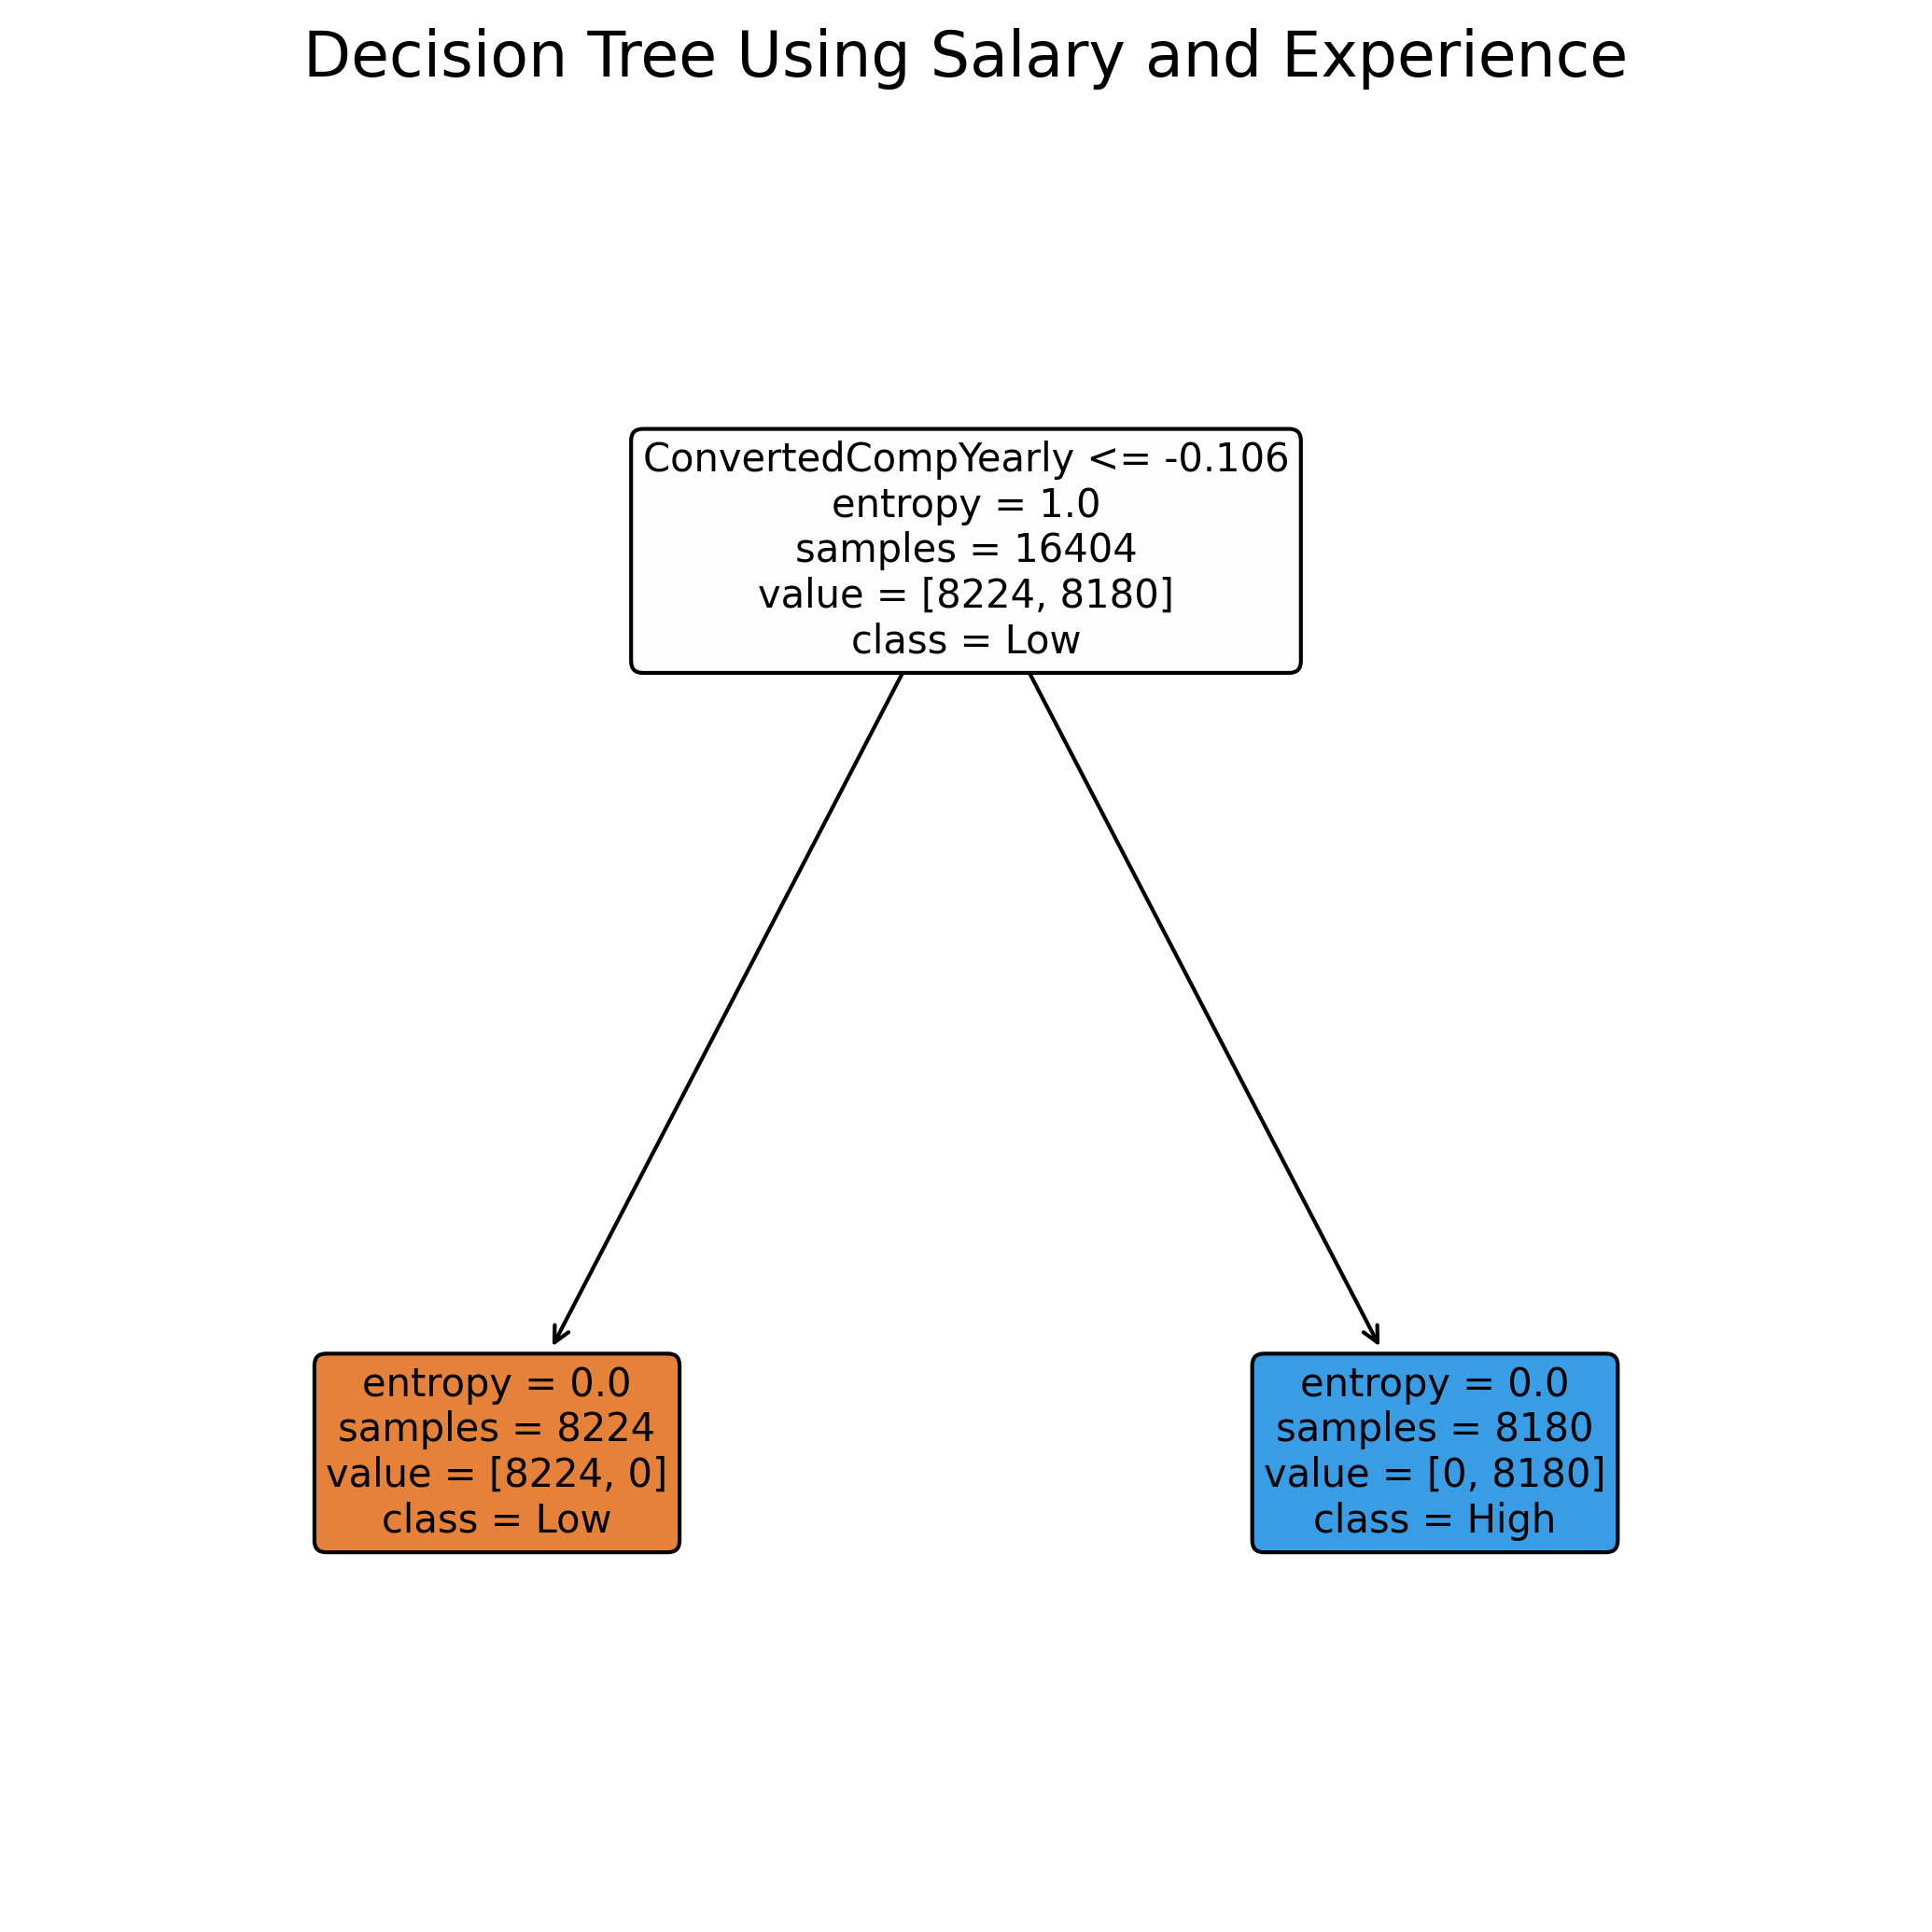

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
# Load the dataset
df = pd.read_csv("survey_cleaned_with_clusters.csv")

# Convert YearsCode to numeric
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors="coerce")

# Keep only salary, experience, and target
df_cleaned = df[["ConvertedCompYearly", "YearsCode", "highIncome"]].dropna()

# Define features and target
X = df_cleaned[["ConvertedCompYearly", "YearsCode"]]
y = df_cleaned["highIncome"]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the decision tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
dt.fit(X_train_scaled, y_train)

# Plot the tree
plt.figure(figsize=(7, 7), dpi=300)
plot_tree(
    dt,
    feature_names=["ConvertedCompYearly", "YearsCode"],
    class_names=["Low", "High"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Using Salary and Experience", fontsize=16)
plt.tight_layout()
plt.show()


In [60]:
features = ["Country", "Employment", "EdLevel", "DevType", "LanguageHaveWorkedWith", "YearsCode", "ConvertedCompYearly"]
target = "highIncome"

df_cleaned = df[features + [target]].dropna()

# One-hot encode
X = pd.get_dummies(df_cleaned[features], drop_first=True)
y = df_cleaned[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)
knn = KNeighborsClassifier(n_neighbors=5)

lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

ensemble = VotingClassifier(estimators=[
    ('lr', lr), ('dt', dt), ('knn', knn)
], voting='hard')

ensemble.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4)),
                             ('knn', KNeighborsClassifier())])

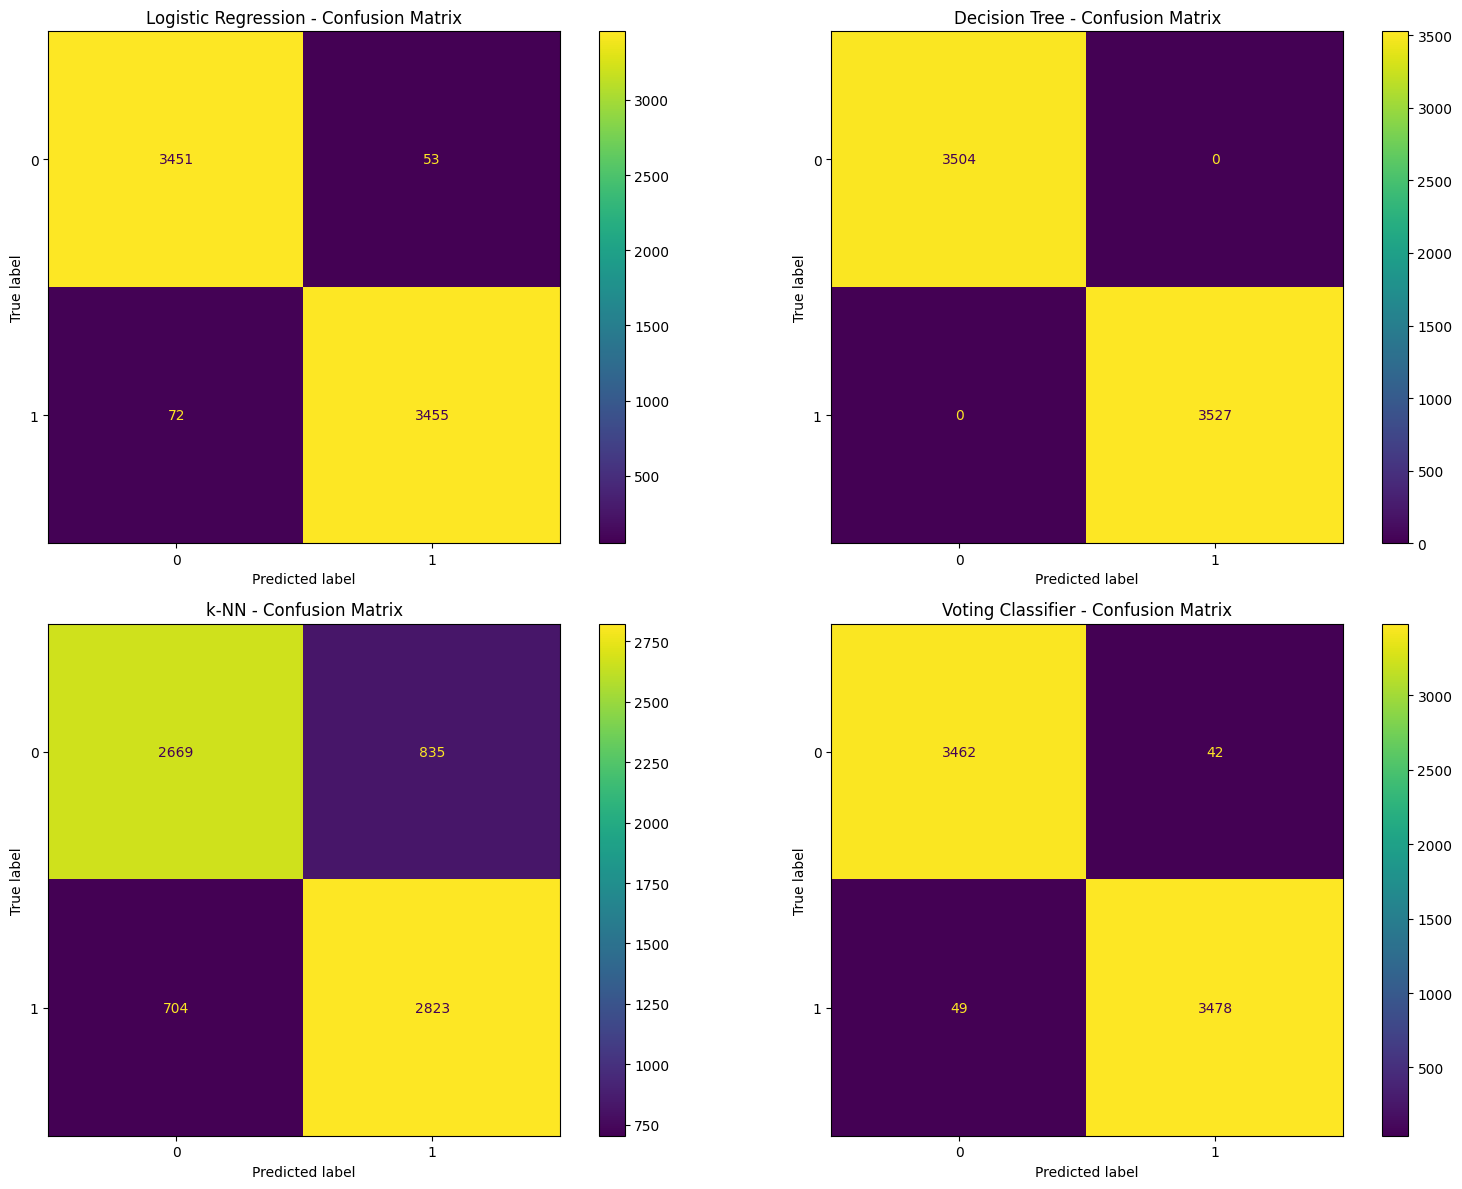

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "k-NN": knn,
    "Voting Classifier": ensemble
}
for ax, (name, model) in zip(axs.flat, models.items()):
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, ax=ax)
    ax.set_title(f"{name} - Confusion Matrix")

plt.tight_layout()
plt.show()


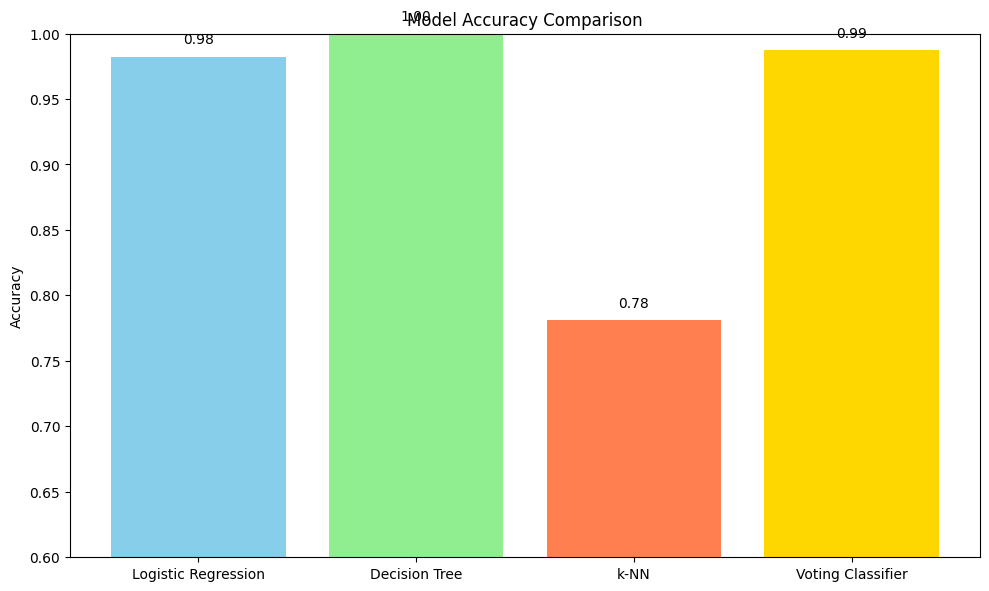

In [64]:
from sklearn.metrics import accuracy_score

accuracies = [
    accuracy_score(y_test, lr.predict(X_test_scaled)),
    accuracy_score(y_test, dt.predict(X_test_scaled)),
    accuracy_score(y_test, knn.predict(X_test_scaled)),
    accuracy_score(y_test, ensemble.predict(X_test_scaled))
]
model_names = ["Logistic Regression", "Decision Tree", "k-NN", "Voting Classifier"]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=["skyblue", "lightgreen", "coral", "gold"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.6, 1.0)
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{acc:.2f}", ha='center')
plt.tight_layout()
plt.show()


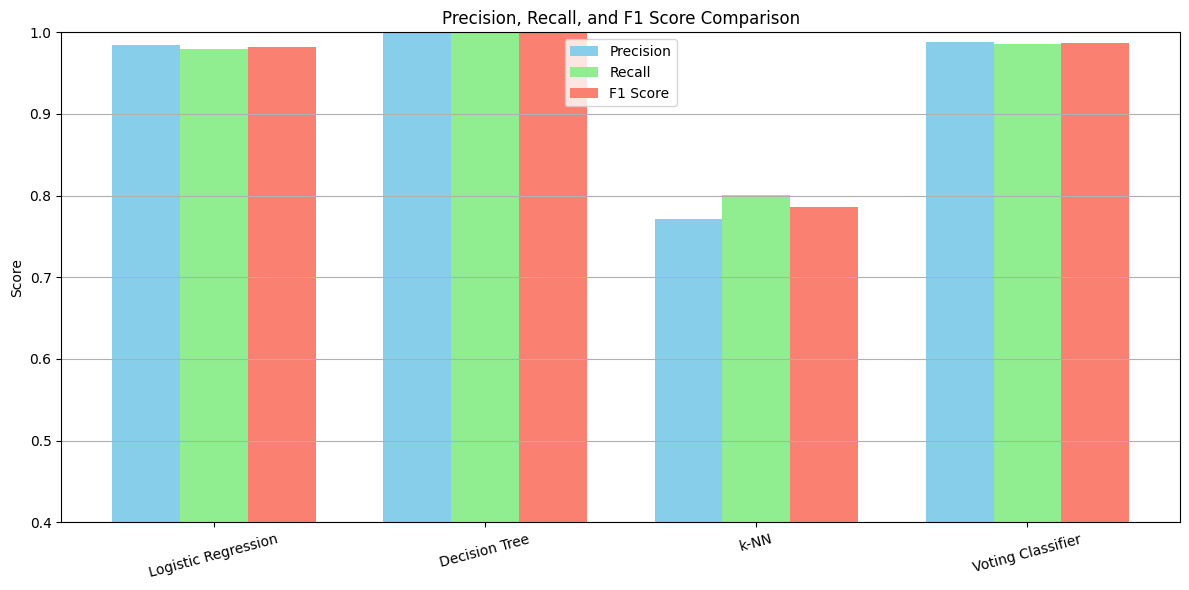

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute scores
metrics = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "k-NN": knn,
    "Voting Classifier": ensemble
}

precision = []
recall = []
f1 = []

for model in metrics.values():
    y_pred = model.predict(X_test_scaled)
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

# Plot
import numpy as np
x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width=width, label="Precision", color='skyblue')
plt.bar(x, recall, width=width, label="Recall", color='lightgreen')
plt.bar(x + width, f1, width=width, label="F1 Score", color='salmon')

plt.xticks(x, metrics.keys(), rotation=15)
plt.ylim(0.4, 1.0)
plt.title("Precision, Recall, and F1 Score Comparison")
plt.ylabel("Score")
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()


,Model,Precision,Recall,F1 Score
0,Logistic Regression,0.98,0.98,0.98
1,Decision Tree,1.00,1.00,1.00
2,k-Nearest Neighbors,0.76,0.80,0.78
3,Voting Classifier,0.99,0.99,0.99


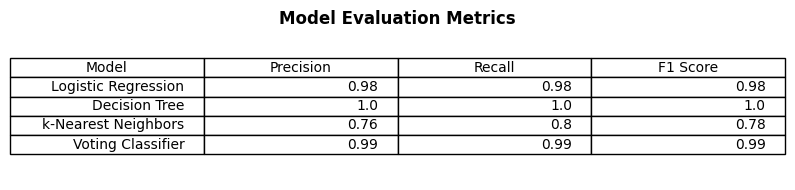

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Define model evaluation metrics
data = {
    "Model": ["Logistic Regression", "Decision Tree", "k-Nearest Neighbors", "Voting Classifier"],
    "Precision": [0.98, 1.00, 0.76, 0.99],
    "Recall": [0.98, 1.00, 0.80, 0.99],
    "F1 Score": [0.98, 1.00, 0.78, 0.99]
}

# Create DataFrame
evaluation_df = pd.DataFrame(data)

# Display the DataFrame as a pretty table in notebook
from IPython.display import display
display(evaluation_df)

# Optional: visualize as a static table using matplotlib (for export)
fig, ax = plt.subplots(figsize=(8, 2))  # Adjust size for your report
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=evaluation_df.values, colLabels=evaluation_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("Model Evaluation Metrics", fontweight="bold")
plt.tight_layout()
plt.show()


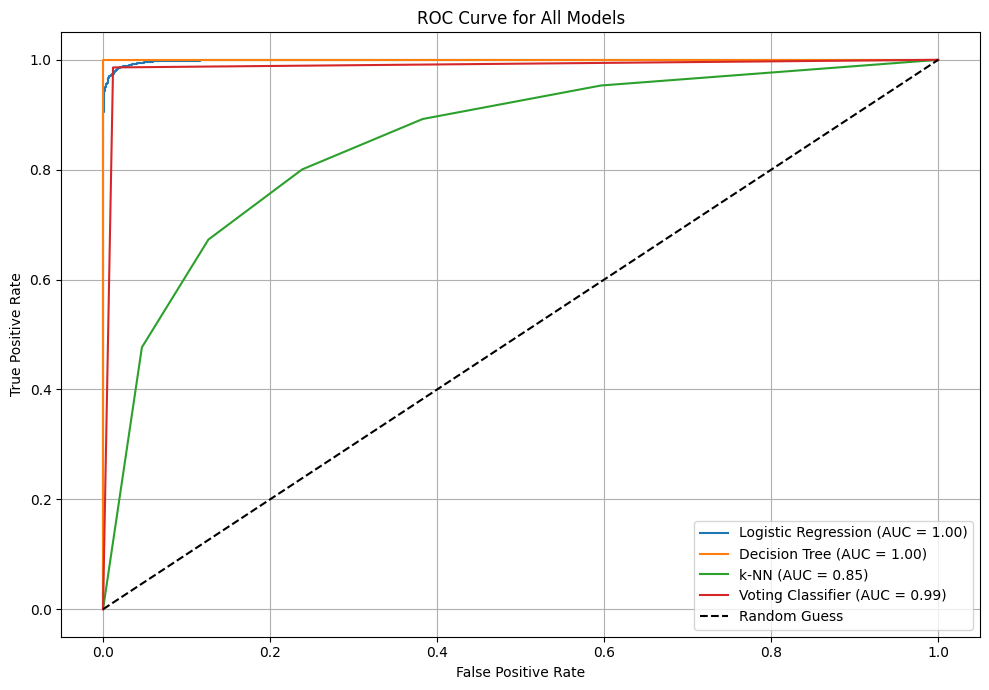

In [67]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dictionary of models
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "k-NN": knn,
    "Voting Classifier": ensemble
}

plt.figure(figsize=(10, 7))

# Plot ROC for each model
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # fallback for models like VotingClassifier in hard voting
        y_scores = model.predict(X_test_scaled)
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot baseline
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")

plt.title("ROC Curve for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
